<a href="https://colab.research.google.com/github/bscruz/database-assignment/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Run this cell
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline




url = 'healthcare_dataset.csv'
df = pd.read_csv(url)

df.head(5)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


  Medical Condition  Billing Amount
3          Diabetes    2.385397e+08
5           Obesity    2.382149e+08
0         Arthritis    2.373291e+08
4      Hypertension    2.357207e+08
1            Asthma    2.354598e+08
2            Cancer    2.321679e+08


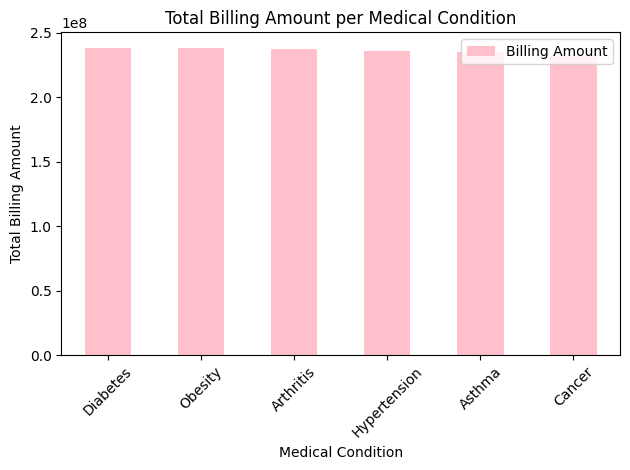

In [6]:
billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].sum().reset_index()

billing_by_condition = billing_by_condition.sort_values(by='Billing Amount', ascending=False)
print(billing_by_condition)
ax = billing_by_condition.plot(x='Medical Condition', y='Billing Amount', kind='bar',
                               color='pink', title='Total Billing Amount per Medical Condition')
ax.set_xlabel('Medical Condition')
ax.set_ylabel('Total Billing Amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


# the graph shows that the most amount billed per medical condition was Hypertension so I decided to look more into it


In [7]:
Karen = df[df['Name']== 'kARen klInE']
print(Karen)

              Name  Age  Gender Blood Type Medical Condition  \
34613  kARen klInE   79  Female        AB+            Cancer   
51313  kARen klInE   74  Female        AB+            Cancer   

      Date of Admission             Doctor          Hospital  \
34613        2021-06-19  Dr. Joseph Gordon  Hernandez-Morton   
51313        2021-06-19  Dr. Joseph Gordon  Hernandez-Morton   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
34613   UnitedHealthcare    52373.032374          181         Urgent   
51313   UnitedHealthcare    52373.032374          181         Urgent   

      Discharge Date  Medication  Test Results  
34613     2021-07-03  Penicillin  Inconclusive  
51313     2021-07-03  Penicillin  Inconclusive  


In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [8]:
bill = df['Name'].count()
print(bill)

55500


In [9]:
mostcost = df.groupby('Name')['Billing Amount'].sum().sort_values(ascending=False).head(5)
leastcost = df.groupby('Name')['Billing Amount'].sum().sort_values(ascending=True).head(5)
print(mostcost)
print(leastcost)

Name
kARen klInE       104746.064748
LAuRie hOod       104340.073707
pAmElA NoRmAn     103951.936271
Erin HaNSen       102863.954358
GaBRIel hARris    102561.985891
Name: Billing Amount, dtype: float64
Name
tErRy WILSOn               -2633.237163
mr. ChRIStOPhER aLvARaDO   -2620.545789
james lUnA                 -2008.492140
elIzABETH thOMPson         -1774.048438
EMMA savAGE                -1660.009373
Name: Billing Amount, dtype: float64


In [10]:
df.dtypes

,0
Name,object
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Date of Admission,object
Doctor,object
Hospital,object
Insurance Provider,object
Billing Amount,float64


                 Name  Age  Gender Blood Type Medical Condition  \
11     aaRon MARtiNeZ   38  Female         A-      Hypertension   
18       LuKE BuRgEss   34  Female         A-      Hypertension   
24     PAUl hEndERsOn   72  Female        AB+      Hypertension   
28        MaRy hUNter   38  Female         O-      Hypertension   
29      jOSHUA OLiVer   63  Female         B+      Hypertension   
...               ...  ...     ...        ...               ...   
55475  darrEn andREws   34  Female         A+      Hypertension   
55477     sUE edWardS   56    Male         O+      Hypertension   
55478    gEoRge BAkER   27    Male         B-      Hypertension   
55487  mIsTy RICharDs   78  Female         O-      Hypertension   
55497    HEATher WaNG   38  Female         B+      Hypertension   

      Date of Admission              Doctor                      Hospital  \
11           2023-08-13        Douglas Mayo                   Lyons-Blair   
18           2021-03-04    Justin Moore J

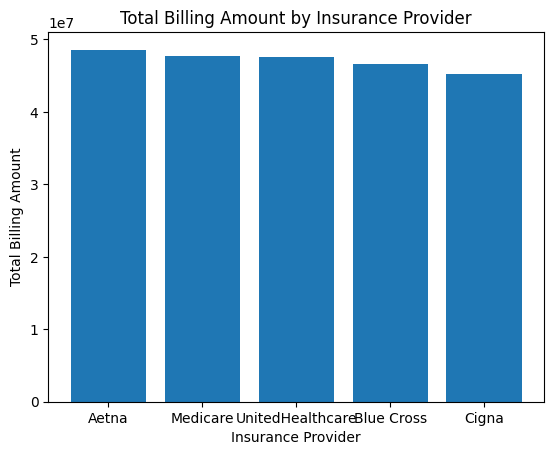

Medication
Ibuprofen      1893
Aspirin        1865
Paracetamol    1849
Lipitor        1848
Penicillin     1790
Name: count, dtype: int64


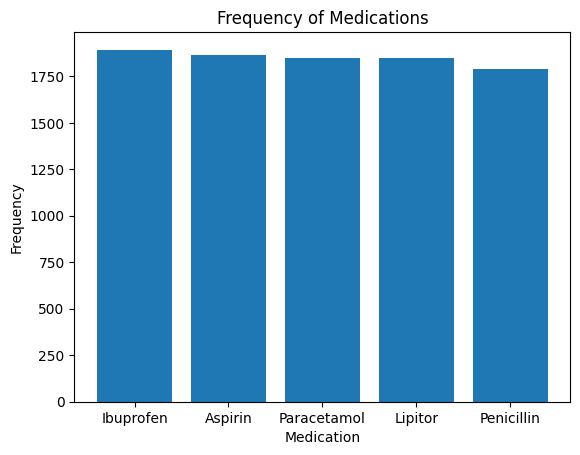

Medication
Ibuprofen      4.898903e+07
Lipitor        4.738559e+07
Aspirin        4.732040e+07
Paracetamol    4.636551e+07
Penicillin     4.566012e+07
Name: Billing Amount, dtype: float64


In [12]:
from re import A
hypertension = df[df['Medical Condition'] == 'Hypertension']


print(hypertension)
df_unique = hypertension.drop_duplicates(subset='Name', keep='first')
insurance = df_unique['Insurance Provider'].value_counts()
print(insurance)

# so it shows the number one insurance provider for people with hypertesion was United Healthercare

costly = df.groupby(hypertension['Insurance Provider'])['Billing Amount'].sum().sort_values(ascending=False).head(5)
print(costly)

# shows which insurance is the one that billed people the most which was Aetna

plt.bar(costly.index, costly.values)
plt.xlabel('Insurance Provider')
plt.ylabel('Total Billing Amount')
plt.title('Total Billing Amount by Insurance Provider')
plt.show()


medication = hypertension['Medication'].value_counts()
print(medication)

plt.bar(medication.index, medication.values)
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.title('Frequency of Medications')
plt.show()

costmed = df.groupby(hypertension['Medication'])['Billing Amount'].sum().sort_values(ascending=False).head(5)
print(costmed)

# iburprofen was billed the most







In [13]:
diabetes = df[df['Medical Condition'] == 'Diabetes']
print(diabetes)
newdf = diabetes[['Medication', 'Insurance Provider', 'Billing Amount']]

billed = newdf.groupby('Insurance Provider')['Billing Amount'].sum().sort_values(ascending=False)
other = newdf.groupby('Medication')['Billing Amount'].sum().sort_values(ascending=False)

medication_billing = newdf.groupby(['Insurance Provider', 'Medication'])['Billing Amount'].sum().reset_index()
print(medication_billing)



                      Name  Age  Gender Blood Type Medical Condition  \
3             andrEw waTtS   28  Female         O+          Diabetes   
6           edwArD EDWaRDs   21  Female        AB-          Diabetes   
12           connOR HANsEn   75  Female         A+          Diabetes   
27       mr. KenNEth MoORE   34  Female         A+          Diabetes   
34        NicOlE RodriGUEz   30  Female        AB+          Diabetes   
...                    ...  ...     ...        ...               ...   
55433    RonALd OBRIeN jr.   72  Female         B+          Diabetes   
55439    cHRiStINE MCCARty   75    Male        AB+          Diabetes   
55462        alYSsA mIlLER   35  Female         A-          Diabetes   
55480         LAurEn mills   33  Female         B-          Diabetes   
55483  kimbErlY RIchArDSoN   15    Male         A-          Diabetes   

      Date of Admission               Doctor                      Hospital  \
3            2020-11-18          Kevin Wells    Hernandez

                     Name  Age  Gender Blood Type Medical Condition  \
29          jOSHUA OLiVer   63  Female         B+      Hypertension   
37     CasSAndrA Robinson   26  Female         B-      Hypertension   
57          MIChael MIllS   23    Male         O-      Hypertension   
59      jACqUeLINE jORdaN   51    Male         O+      Hypertension   
81            ChAd MorEnO   67    Male        AB+      Hypertension   
...                   ...  ...     ...        ...               ...   
55424        bRiAN hArMON   45    Male         O+      Hypertension   
55438         pam jOhNsOn   51    Male         O-      Hypertension   
55446       RICHArd MoORe   63  Female         B+      Hypertension   
55463       JeNNIFeR WAng   25    Male         A+      Hypertension   
55471          iaN MuRpHy   73  Female         B+      Hypertension   

      Date of Admission               Doctor                      Hospital  \
29           2023-10-03      Brandy Mitchell                Guerrero-

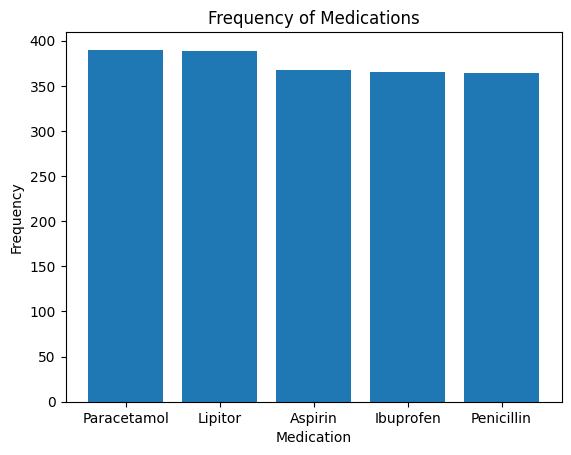

NameError: name 'paracetemol' is not defined

In [15]:
aetna = hypertension[hypertension['Insurance Provider'] == 'Aetna']
print(aetna)

aetnamed = aetna['Medication'].value_counts()
print(aetnamed)

plt.bar(aetnamed.index, aetnamed.values)
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.title('Frequency of Medications')
plt.show()

# so aetna provided paracetmol more often to people with hypertension while
#iburprofen was the most prescribed medication overall for others insurance providers







Admission Type
Elective     3221
Urgent       3023
Emergency    3001
Name: count, dtype: int64


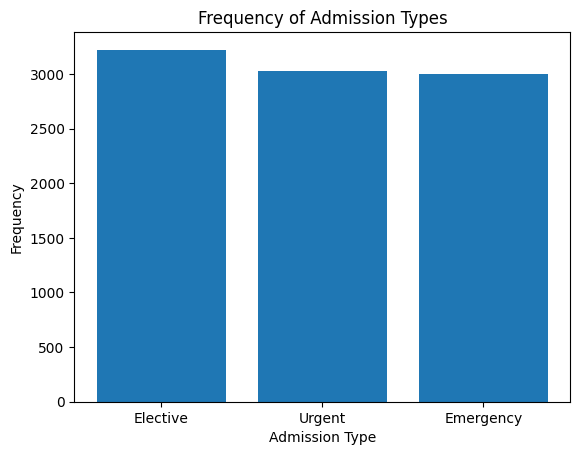

In [16]:
admissiontype = hypertension['Admission Type'].value_counts()
print(admissiontype)

plt.bar(admissiontype.index, admissiontype.values)
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.title('Frequency of Admission Types')
plt.show()

# most people with hypertension were being admitted under elective

Medical Condition  Admission Type
Arthritis          Urgent            3117
                   Emergency         3108
                   Elective          3083
Asthma             Elective          3102
                   Urgent            3081
                   Emergency         3002
Cancer             Elective          3148
                   Urgent            3064
                   Emergency         3015
Diabetes           Urgent            3229
                   Elective          3058
                   Emergency         3017
Hypertension       Elective          3221
                   Urgent            3023
                   Emergency         3001
Obesity            Emergency         3126
                   Urgent            3062
                   Elective          3043
Name: count, dtype: int64


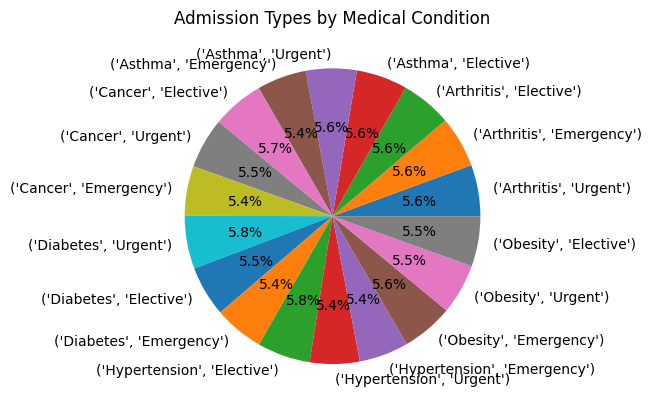

Admission Type
Elective     25602.226311
Emergency    25497.397157
Urgent       25517.364497
Name: Billing Amount, dtype: float64


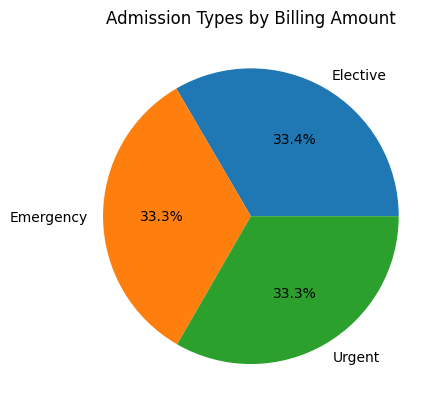

In [17]:
med_admission = df.groupby('Medical Condition')['Admission Type'].value_counts()
print(med_admission)
plt.pie(med_admission, labels=med_admission.index, autopct='%1.1f%%')
plt.title('Admission Types by Medical Condition')
plt.show()

#Admission by Elective was the one that was the most billed
admissionavg = df.groupby('Admission Type')['Billing Amount'].mean()
print(admissionavg)
plt.pie(admissionavg, labels=admissionavg.index, autopct='%1.1f%%')
plt.title('Admission Types by Billing Amount')
plt.show()
# hypertension with an admission of elective was the most frequent this could be why
# it was billed the most

                     Name  Age  Gender Blood Type Medical Condition  \
29          jOSHUA OLiVer   63  Female         B+      Hypertension   
37     CasSAndrA Robinson   26  Female         B-      Hypertension   
57          MIChael MIllS   23    Male         O-      Hypertension   
59      jACqUeLINE jORdaN   51    Male         O+      Hypertension   
81            ChAd MorEnO   67    Male        AB+      Hypertension   
...                   ...  ...     ...        ...               ...   
55424        bRiAN hArMON   45    Male         O+      Hypertension   
55438         pam jOhNsOn   51    Male         O-      Hypertension   
55446       RICHArd MoORe   63  Female         B+      Hypertension   
55463       JeNNIFeR WAng   25    Male         A+      Hypertension   
55471          iaN MuRpHy   73  Female         B+      Hypertension   

      Date of Admission               Doctor                      Hospital  \
29           2023-10-03      Brandy Mitchell                Guerrero-

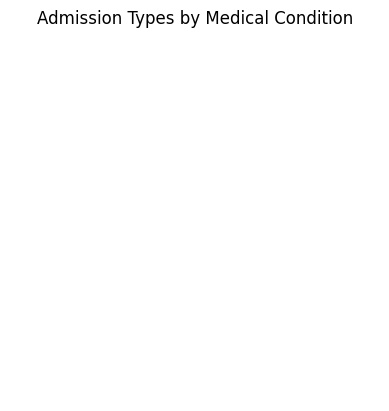

Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []


In [22]:
aetna = hypertension[hypertension['Insurance Provider'] == 'Aetna']
cigar = hypertension[hypertension['Insurance Provider'] == 'Cigar']
print(aetna)
print(cigar)
med_admission = cigar.groupby('Medical Condition')['Admission Type'].value_counts()
print(med_admission)
plt.pie(med_admission, labels=med_admission.index, autopct='%1.1f%%')
plt.title('Admission Types by Medical Condition')
plt.show()
print(cigar)



Insurance Provider  Medication
Aetna               Lipitor       377
Blue Cross          Lipitor       376
Cigna               Lipitor       396
Medicare            Lipitor       371
UnitedHealthcare    Lipitor       373
Name: count, dtype: int64


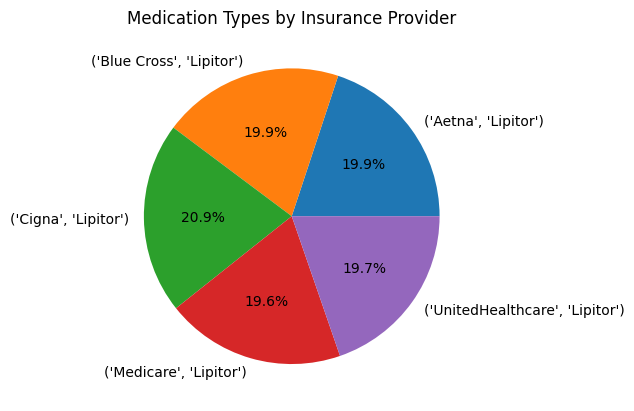

In [24]:
lipitor = diabetes[diabetes['Medication'] == 'Lipitor']
lipitorprovided = lipitor.groupby('Insurance Provider')['Medication'].value_counts()
print(lipitorprovided)
plt.pie(lipitorprovided, labels=lipitorprovided.index, autopct='%1.1f%%')
plt.title('Medication Types by Insurance Provider')
plt.show()

#Liptor had second largest billed amount for medication under the insurance Cigna.
#In spite of Cigna having the third largest number of patients it was gaining the most amount
#of money by providing the Lipitor medication. Cigna was providing Lipitor medication at a higher amount than other insrance providers.
